<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Descriptive Statistics

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

## Demo

Let's look at the Ames housing data again.

In [3]:
ames_df = pd.read_csv('../assets/data/ames_train.csv')

If you were going to choose just two variables to use to predict sales price, how would you choose?

You want variables that are each strongly related to sales price. It also helps if they are not strongly related to each other, so that they are not providing redundant information.

One way to measure how related two variables are to each other is with a "correlation coefficient." Correlation coefficients vary from -1 (strongly negatively related) to 1 (strongly positively related), with unrelated variables having correlation 0.

Let's check the correlation of each numeric feature with sales price.

In [4]:
ames_df.corr().loc[:, 'SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We see that the variables `OverallQual` and `GarageCars` that we looked at in the previous module are both in the top three. To what degree are those top three variables correlated with each other?

In [5]:
ames_df.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars']].corr()

,OverallQual,GrLivArea,GarageCars
OverallQual,1.000000,0.593007,0.600671
GrLivArea,0.593007,1.000000,0.467247
GarageCars,0.600671,0.467247,1.000000


Based on these numbers, you could make a case for using either `OverallQual` and `GrLivArea` (most correlated with sales price) or `GrLivArea` and `GarageCars` (second and third most correlated with sales price, and less correlated with each other).

At this point you could just try all of the combinations and see which one gives the best score, but looking at correlation coefficients helped us narrow our view to the most promising possibilities right off the bat.

This module is about using "descriptive statistics" to learn about your data. As we just saw, descriptive statistics can help inform your model-building process.

## Pandas Review

**Exercise (pair programming, 8 mins.)**

Examine the Titanic Data Set

- Use pandas to read in the Titanic data set from ../assets/data/titanic.csv

In [6]:
# /scrub/
titanic_path = Path('..', 'assets', 'data', 'titanic.csv')
titanic = pd.read_csv(titanic_path)

- Print out the column names.

In [7]:
# /scrub/
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

- Print out the dimensions of the DataFrame.

In [8]:
# /scrub/
titanic.shape

(891, 11)

- Print out the data types of the columns.

In [9]:
# /scrub/
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

- Print out the first five rows of the data.

In [10]:
# /scrub/
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Count the number of occurrences of each value in the `pclass` column.

In [11]:
# /scrub/
titanic.loc[:, 'pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

- Pull up descriptive statistics for numeric variables.

In [12]:
# /scrub/
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Get summary information for non-numeric columns.

In [13]:
# /scrub/
titanic.describe(include=['object'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dennis, Mr. Samuel",male,347082,B96 B98,S
freq,1,577,7,4,644


- Which variables have missing values? (Don't confuse missing summary statistics with missing values of the variable!)

/scrub/

Age, cabin, embarked

$\blacksquare$

## Measures of Central Tendency

- Mean
- Median
- Mode

### Mean
The **mean** (average) of a set of numbers is their sum divided by their count:
$$\bar{X} =\frac 1n\sum_{i=1}^nx_i$$

### Median
The median refers to the midpoint in a series of numbers:

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

**Exercise (in groups, 8 mins.)**

For these exercises, you may use base Python functions and operators such as `+`, `/`, `sum`, and `len`, but do not use any higher-level functions or methods that would give you the answer more directly (e.g. `np.mean`).

**Use this list for the following exercises:**

In [14]:
nums1 = [75, 87, 49, 68, 75, 84, 94]

- What is the mean?

In [15]:
# /scrub/
sum(nums1) / len(nums1)

76.0

- What is the median?

/scrub/

Sorted: 49, 68, 75, 75, 84, 87, 94

Median is the middle (fourth) number: 75

- What is the mode?

/scrub/

75

**Use this set of numbers for the following exercises:**

In [16]:
nums2 = [1, 1, 2, 3, 4, 5, 6, 7, 8, 1000]

- What is the mean?

In [17]:
# /scrub/
# Mean
sum(nums2) / len(nums2)

103.7

- What is the median?

/scrub/

1, 1, 2, 3, [4, 5], 6, 6, 8, 1000

4.5

- What is the mode?

/scrub/

1

- For the second list of numbers, which "measure of central tendency" best captures the intuitive idea of a "typical" value in the set? Why do the others return "atypical" values?

/scrub/

The median (4.5) is the most typical value. The outlier value 1000 has a large effect on the mean, but it does not affect the median any more than any other value greater than 4.5. The mode isn't very meaningful when we have little repetition.

- If you are worried about outliers in a data set throwing off your results for the typical case, would you use methods based on the mean or the median?

/scrub/

Use the median rather than the mean to make your method more resistant to outliers.

$\blacksquare$

When the distribution of values is nice and symmetric, the mean, median, and mode are about the same. When it is **skewed**, meaning that you have more values far from the center in one direction or the other, the mean gets pulled toward the skew more than the median, which gets pulled more than the mode.

![](../assets/images/skewness_and_central_tendency.png)

### Measures of Central Tendency in Pandas

Pandas has `mean`, `median`, and `mode` methods.

In [18]:
# Use pandas to find the mean of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].mean()

32.204207968574636

In [19]:
# Use pandas to find the median of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].median()

14.4542

In [20]:
# Use pandas to find the mode of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].mode()

0    8.05
dtype: float64

**Exercise (1 min.)**

- The mean, median, and mode are quite different in this case. What does that fact tell you about fares on the Titanic?

/scrub/

The distribution of fares is skewed. That makes sense: the majority of people ride third class, so the mode is the third-class price; the "typical," "middle" passenger rides second class, so the median is the second-class price; and first-class tickets are much more expensive than second- or third-class tickets, so they have a lot of influence on the mean.

$\blacksquare$

## Measures of Dispersion: Standard Deviation and Variance

![](../assets/images/variance_magnitude.png)

The **sample variance** of a data set is the average squared distance of each point from the mean, except that we divide by $n-1$ instead of $n$: $\frac{1}{n-1}\sum (X - \bar{X})^2$. (We divide by $n-1$ to make sample variance an "unbiased estimator" of true variance.)

The **sample standard deviation** is the square root of the sample variance: $\sqrt{\frac{1}{n-1}\sum (X - \bar{X})^2}$

In [21]:
# Take the first 5 rows of Titanic age data
# /scrub/
first_five = titanic.loc[:4, 'age']
first_five

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [22]:
# Calculate the mean "by hand"
# /scrub/
mean = (22 + 38 + 26 + 35 + 35) / 5.0
mean

31.2

In [23]:
# Calculate the variance "by hand"
# /scrub/
variance = ((22 - mean)**2
            + (38 - mean)**2
            + (26 - mean)**2
            + (35 - mean)**2
            + (35 - mean)**2) / 4.0
variance

46.699999999999996

In [24]:
# Calculate the standard deviation "by hand"
# /scrub/
np.sqrt(46.699999)

6.833739752141575

In [25]:
# Calculate the mean, variance, and standard deviation using Pandas
# /scrub/
print(first_five.mean())
print(first_five.var())
print(first_five.std())

31.2
46.699999999999996
6.833739825307955


## A Brief Diagression into *Model* Bias and Variance 

- Model **bias** is systematic error that won't go away no matter how much data you collect.
- Model **variance** is random error that will fade away as you collect more data (and refit the model).
- What you should do next to improve your model depends on whether it has more of a bias problem or more of a variance problem.

/scrub/

[iPad/board]

![](../assets/images/bias_variance.png)

- Red has high bias -- more data will let you hone in on the best possible line, but you'll still have a lot of error.
- Purple has high variance -- with enough data it will catch on to what's really going on, but right now it's chasing the individual data points around. It has low error on these points, but it probably wouldn't do well on new data.
- Green strikes a good balance.

<a id="correlation-and-association"></a>
## Correlation and Association

The magnitude of the **(Pearson) correlation coefficient** for a pair of variables measures how well you could predict one as a linear function of the other; its sign indicates whether the tend to move in the same direction or in opposite directions.

![Example correlation values](../assets/images/correlation_examples.png)

**Exercise (1 min.)**

- Based on the characterization of the correlation coefficient given above, why is its value 0 in the third row even though the two variables are clearly related?

/scrub/

The Pearson correlation coefficient only reflects a *linear* relationship.

$\blacksquare$

<a id="codealong-correlation-in-pandas"></a>
## Correlation in Pandas

In [30]:
# Display the correlation matrix for all Titanic variables
# /scrub/
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


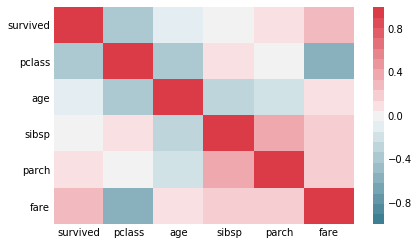

In [31]:
# Use Seaborn to plot a heat map of the correlation matrix
ax = sns.heatmap(titanic.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21))

> **Aside:** The `h_neg` and `h_pos` arguments in `sns.diverging_palette` refer to hues in an HSV colorspace:

![](../assets/images/hsv_colorspace.png)

In [32]:
# Take a closer look at survived and fare using a scatter plot
# /scrub/
ax = titanic.plot.scatter(x='fare', y='survived', alpha=.1, ax=ax)

<a id="the-normal-distribution"></a>
## The Normal Distribution

## Normal and Skewed Distributions

![](../assets/images/normal_distribution.png)

A normal distribution has the shape of a symmetric "Bell curve"

![](../assets/images/normal_std.png)

### Why do we care?

- Aggregated processes are distributed normally, regardless of their underlying distributions, as long as they aren't too correlated ([central limit theorem](https://twitter.com/EJWagenmakers/status/996424265405747200)). As a result, they show up a lot.
- They have some nice mathematical properties.
- Many models (e.g. linear regression) are designed for normally distributed data.

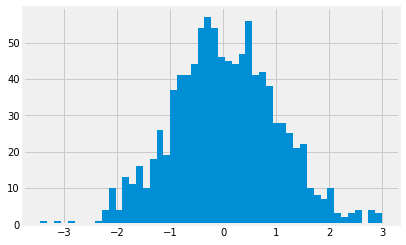

In [33]:
# Plot a histogram of 1,000 samples from a random normal distribution
data = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(data, bins=50);

###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](../assets/images/skewness---mean-median-mode.jpg)

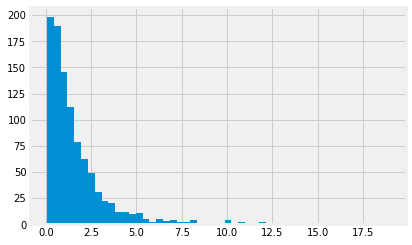

In [34]:
# Plot a lognormal distribution generated with NumPy
data = np.random.lognormal(size=1000)

fig, ax = plt.subplots()
ax.hist(data, bins=50);

Many algorithms rely on the mean being "typical." With skewed data, you may have to transform your data or set your algorithms to work with the median.

### Determining the Distribution of Your Data

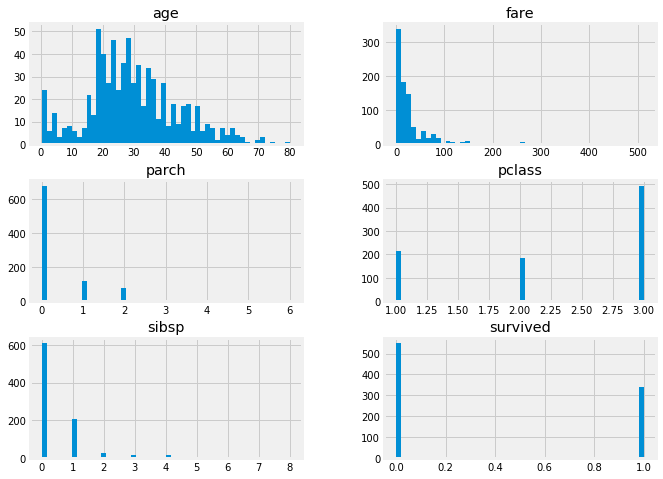

In [35]:
# Plot all variables in titanic using histograms
# /scrub/
axes = titanic.hist(figsize=(10, 8), bins=50)

**Exercise (1 min.)**

- Which Titanic variables are normal? Which are skewed? How does these characteristics affect our data modeling?

/scrub/

- Fare has a strong positive skew.
- Age is interesting. The bulk of the distribution has a positive skew, but there are many very young children. I wonder if there is a data quality issue that is affecting the reported ages under 20.
- The other variables are categorical, so normal/skewed doesn't apply.

A method that relies on normality might be OK for age; definitely not for fare.

$\blacksquare$

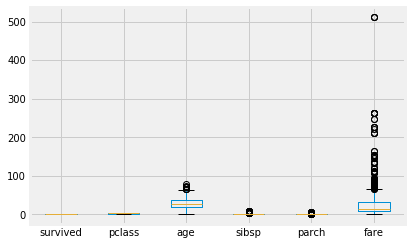

In [36]:
# Create boxplots of the variables.
# /scrub/
ax = titanic.plot.box()

The box encloses the middle 50% of the values. The whiskers extend out to the min and max, except that points more than 1.5 times as far from the median as the size of the box are considered "outliers" and plotted as individual points.

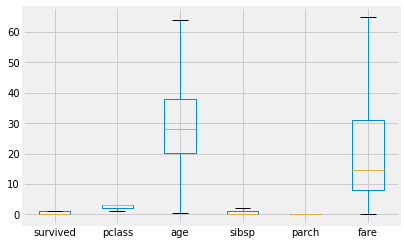

In [37]:
# Use showfliers=False to omit "outliers"
# /scrub/
ax = titanic.plot.box(showfliers=False)

## Module Review

- Many summary statistics fall into one of these categories:
    - Measures of central tendency
    - Measures of dispersion
    - Meaures of association
- Model bias is systematic error that won't go away no matter how much data you have.
- Model variance is random error that goes away as the size of the data set increases.
- The distinction between bias and variance is important because what you should do next to improve your model depends primarily on whether it has more of a bias problem or more of a variance problem.
- Normal distributions are common and important. They are characterized by a mean and a variance. They have no skew.
- Skew in a distribution affects the mean strongly, the median weakly, and the mode not at all.